
# Linear Regression
- X-y split (y is the target variable, in this case, "total claim amount")
- Train-test split.
- Standardize the data (after the data split!) *on the training set*.
- Apply linear regression.
- Model Interpretation.
- make a dataframe to show real vs perdicted


In [1]:
import pandas as pd
import numpy as np

file = '/content/marketing_customer_analysis_clean.csv'
df = pd.read_csv(file)
df = df.dropna()

In [2]:
num = df.select_dtypes('number')
num.drop(axis=1,columns=['total_claim_amount'],inplace=True)

In [3]:
num.head(1)

,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month
0,0,4809.21696,48029,61,7.0,52,0.0,9,2


In [4]:
#splitting the data

X = num #the numericals columns, apart from 'total_claim_amount'
y = df['total_claim_amount']

In [5]:
import seaborn as sns

# Creating the model

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 100)

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler = MinMaxScaler()

In [10]:
scaler.fit(X_train) #fitting for the training data
X_train = pd.DataFrame(scaler.transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lm = LinearRegression()

In [13]:
model = lm.fit(X_train, y_train)

In [14]:
model.coef_

array([   2.24973588,  -42.39521634, -335.36728526, 1247.81077384,
         -4.85662288,  -17.64304694,  -13.73037378,    1.41209812,
         -1.71785302])

In [15]:
model.intercept_

405.21991998135263

# Real vs. Predicted dataframe

In [22]:
y_pred = np.array(model.predict(X_test))

In [20]:
y_test.reset_index(drop=True)

0       340.800000
1       195.153339
2       770.400000
3       336.000000
4       561.600000
           ...    
2723    345.600000
2724    664.280864
2725    684.000000
2726     25.713622
2727    497.684017
Name: total_claim_amount, Length: 2728, dtype: float64

In [26]:
real_vs_pred = pd.DataFrame({'y_test': y_test, 'y_pred':y_pred})

In [27]:
real_vs_pred

,y_test,y_pred
1250,340.800000,358.143847
5438,195.153339,368.518441
10156,770.400000,635.380275
3441,336.000000,260.986391
682,561.600000,561.538016
...,...,...
5063,345.600000,345.142663
10053,664.280864,640.772855
3453,684.000000,577.554749
9241,25.713622,289.184998


# Model interpetation

In [28]:
from sklearn.metrics import mean_squared_error as mse

In [29]:
mse(real_vs_pred['y_test'], real_vs_pred['y_pred']) #mean squared error

42442.78552475177

In [32]:
from sklearn.metrics import mean_absolute_error as mae

In [33]:
mae(real_vs_pred['y_test'], real_vs_pred['y_pred']) #mean absolute error

145.29098026667322

<Axes: >

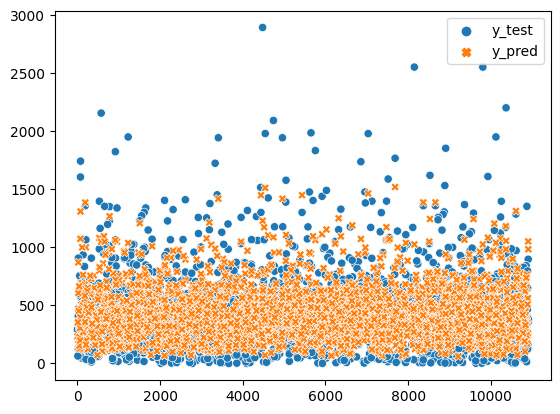

In [34]:
sns.scatterplot(real_vs_pred)